# 혼동 행렬 (Confusion Matrix)

### 개념 요약
**혼동 행렬(Confusion Matrix)**은 분류(Classification) 모델의 성능을 평가하기 위한 표임. 모델의 예측이 실제 값과 비교하여 얼마나 정확한지, 그리고 어떤 유형의 오류를 범하는지를 한눈에 보여줌.

단순히 '정확도(Accuracy)'만으로는 알 수 없는 모델의 세부적인 성능을 파악하는 데 필수적임. 특히 데이터가 불균형할 때 모델의 진짜 성능을 평가하는 데 유용하며, 정밀도(Precision), 재현율(Recall) 등 다양한 평가 지표를 계산하는 기반이 됨.

### 행렬의 구성 요소 📊
혼동 행렬은 4가지 핵심 요소로 구성됨. (Positive: 1, Negative: 0)

* **True Positive (TP, 진양성):** 모델이 **Positive**를 **Positive**로 올바르게 예측. (정답)
* **True Negative (TN, 진음성):** 모델이 **Negative**를 **Negative**로 올바르게 예측. (정답)
* **False Positive (FP, 위양성):** 모델이 **Negative**를 **Positive**로 잘못 예측. (1종 오류, Type I Error)
* **False Negative (FN, 위음성):** 모델이 **Positive**를 **Negative**로 잘못 예측. (2종 오류, Type II Error)

| | 예측: Positive (1) | 예측: Negative (0) |
| :--- | :---: | :---: |
| **실제: Positive (1)** | **TP** | **FN** |
| **실제: Negative (0)** | **FP** | **TN** |

#### 주요 평가 지표
* **정확도 (Accuracy):** 전체 예측 중 올바른 예측의 비율. $$ \frac{TP + TN}{TP + TN + FP + FN} $$
* **정밀도 (Precision):** Positive로 예측한 것 중 실제 Positive의 비율. $$ \frac{TP}{TP + FP} $$
* **재현율 (Recall / Sensitivity):** 실제 Positive 중 모델이 Positive로 예측한 비율. $$ \frac{TP}{TP + FN} $$
* **F1 점수 (F1 Score):** 정밀도와 재현율의 조화 평균. $$ 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy scikit-learn matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### 예제 데이터 준비 (Data Preparation)
이진 분류 문제에 대한 실제 정답과 모델의 예측 결과를 생성함.

In [2]:
# 실제 정답 (10개)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

# 모델 예측
y_pred = np.array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

print(f"실제 정답 (y_true): {y_true}")
print(f"모델 예측 (y_pred): {y_pred}")

실제 정답 (y_true): [1 0 1 1 0 1 0 0 1 1]
모델 예측 (y_pred): [1 1 1 0 0 1 0 0 1 0]


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 혼동 행렬의 각 구성 요소(TP, TN, FP, FN)를 직접 계산하는 함수를 구현함.

In [3]:
def compute_confusion_matrix_elements(y_true, y_pred):
    """NumPy를 이용해 혼동 행렬의 구성 요소를 계산"""
    # (y_true == 1) & (y_pred == 1)과 같이 논리 연산을 통해 각 요소를 찾음
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # 핵심 변수 확인
    print(f"[계산 과정]")
    print(f"  True Positive (TP) : 실제 1, 예측 1 => {TP}개")
    print(f"  True Negative (TN) : 실제 0, 예측 0 => {TN}개")
    print(f"  False Positive (FP): 실제 0, 예측 1 => {FP}개")
    print(f"  False Negative (FN): 실제 1, 예측 0 => {FN}개\n")
    
    return TP, TN, FP, FN

# 직접 구현한 함수로 결과 계산
TP, TN, FP, FN = compute_confusion_matrix_elements(y_true, y_pred)
custom_cm = np.array([[TN, FP], [FN, TP]]) # Scikit-learn 순서와 맞춤: TN, FP, FN, TP

[계산 과정]
  True Positive (TP) : 실제 1, 예측 1 => 4개
  True Negative (TN) : 실제 0, 예측 0 => 3개
  False Positive (FP): 실제 0, 예측 1 => 1개
  False Negative (FN): 실제 1, 예측 0 => 2개



### 결과 확인 및 시각화 (Results & Visualization) 📊
계산된 혼동 행렬을 시각화하고, 이를 바탕으로 주요 평가 지표들을 계산함. `scikit-learn` 라이브러리의 결과와 비교하여 구현을 검증함.

직접 계산한 혼동 행렬:
[[3 1]
 [2 4]]

Scikit-learn의 혼동 행렬:
[[3 1]
 [2 4]]


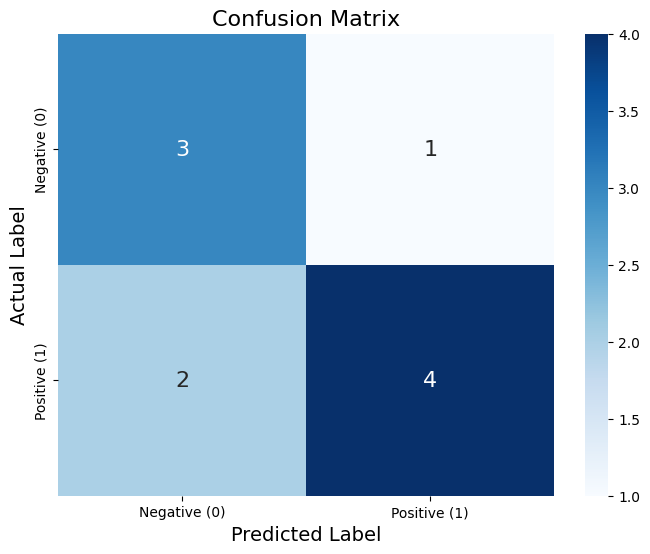

In [4]:
# Scikit-learn을 이용한 혼동 행렬 계산
sklearn_cm = confusion_matrix(y_true, y_pred)

print("직접 계산한 혼동 행렬:")
print(custom_cm)

print("\nScikit-learn의 혼동 행렬:")
print(sklearn_cm)

# Seaborn을 이용한 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(sklearn_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'],
            annot_kws={"size": 16})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [5]:
# Scikit-learn을 이용한 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("--- Scikit-learn을 이용한 평가 지표 ---")
print(f"정확도 (Accuracy): {accuracy:.4f}")
print(f"정밀도 (Precision): {precision:.4f}")
print(f"재현율 (Recall): {recall:.4f}")
print(f"F1 점수 (F1 Score): {f1:.4f}")

--- Scikit-learn을 이용한 평가 지표 ---
정확도 (Accuracy): 0.7000
정밀도 (Precision): 0.8000
재현율 (Recall): 0.6667
F1 점수 (F1 Score): 0.7273


### 고려사항 (Considerations)
* <b>정밀도-재현율 트레이드오프 (Precision-Recall Trade-off):</b> 일반적으로 하나의 지표를 높이면 다른 지표가 낮아지는 경향이 있음. 예를 들어, 암 진단 모델에서는 실제 암 환자를 놓치지 않는 것이 중요하므로 재현율(FN을 낮추는 것)이 더 중요할 수 있음. 반면, 스팸 메일 필터에서는 일반 메일을 스팸으로 분류하지 않는 것이 중요하므로 정밀도(FP를 낮추는 것)가 더 중요할 수 있음.
* **다중 클래스 분류:** 클래스가 3개 이상인 경우 혼동 행렬은 N x N 크기로 확장됨. 각 클래스에 대해 One-vs-Rest 방식으로 정밀도와 재현율을 계산하고, 이들의 평균(Macro, Micro, Weighted)을 내어 모델 성능을 평가함.

### 최종 요약 (Conclusion)
혼동 행렬은 분류 모델의 예측 결과를 네 가지(TP, TN, FP, FN)로 분해하여 성능을 심층적으로 분석하는 강력한 도구임. 단순 정확도를 넘어서 모델이 어떤 종류의 실수를 저지르는지 명확히 보여줌.

이를 통해 계산되는 정밀도, 재현율, F1 점수 등의 지표는 문제의 특성과 목적에 맞게 모델을 평가하고 개선 방향을 설정하는 데 핵심적인 역할을 함. 따라서 분류 모델을 다룰 때 혼동 행렬을 이해하고 활용하는 것은 매우 중요함.